<a href="https://colab.research.google.com/github/akhilerla/IT496/blob/main/AkhilE_DuPontAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
myAPIKey = 'bd9821e7f65af730136944c623b76088'
stock ="FB"
balanceStatements = requests.get (f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIKey}").json()
incomeStatements= requests.get(f"https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIKey}").json()


In [2]:
print (balanceStatements[:5])

[{'date': '2021-12-31', 'symbol': 'FB', 'reportedCurrency': 'USD', 'cik': '0001326801', 'fillingDate': '2022-02-03', 'acceptedDate': '2022-02-02 21:11:04', 'calendarYear': '2021', 'period': 'FY', 'cashAndCashEquivalents': 16601000000, 'shortTermInvestments': 31397000000, 'cashAndShortTermInvestments': 47998000000, 'netReceivables': 14039000000, 'inventory': 0.0, 'otherCurrentAssets': 4629000000, 'totalCurrentAssets': 66666000000, 'propertyPlantEquipmentNet': 69964000000, 'goodwill': 19197000000, 'intangibleAssets': 634000000, 'goodwillAndIntangibleAssets': 19831000000, 'longTermInvestments': 6775000000, 'taxAssets': 0.0, 'otherNonCurrentAssets': 2751000000, 'totalNonCurrentAssets': 99321000000, 'otherAssets': 0.0, 'totalAssets': 165987000000, 'accountPayables': 4083000000, 'shortTermDebt': 1127000000, 'taxPayables': 1256000000, 'deferredRevenue': 561000000, 'otherCurrentLiabilities': 15364000000, 'totalCurrentLiabilities': 21135000000, 'longTermDebt': 12746000000, 'deferredRevenueNonCu

In [3]:
#the numbers from the two most recent years
twoYearBalanceStatement= balanceStatements[:3]
twoYearIncomeStatement = incomeStatements[:3]

In [4]:

#calculate profitability, assetTurnover, and capitalstructure
profitability=[]
assetTurnOver=[]
capitalStructure=[]
returnOnEquity=[]
dates =[]
#gettting details
for i in range (0,3):
   profitabilityValue = twoYearIncomeStatement[i]['netIncome']/twoYearIncomeStatement[i]['revenue']
   profitability. append(profitabilityValue)
   assetTurnOverValue= twoYearIncomeStatement[i]['revenue']/twoYearBalanceStatement[i]['totalAssets']
   assetTurnOver.append(assetTurnOverValue)
   capitalStructureValue=twoYearBalanceStatement[i]['totalAssets']/twoYearBalanceStatement[i]['totalStockholdersEquity']
   capitalStructure.append(capitalStructureValue)
   returnOnEquityValue=profitabilityValue * assetTurnOverValue * capitalStructureValue
   returnOnEquity.append(returnOnEquityValue)
   dates.append(twoYearIncomeStatement[i]['date'])

  

In [5]:
print(returnOnEquity)
print(dates)



[0.31526517669103693, 0.22718840127835369, 0.18292200209788825]
['2021-12-31', '2020-12-31', '2019-12-31']


In [6]:
from collections import defaultdict
df1 = pd.DataFrame(columns = ['year','profitability','assetTurnOver','capitalStructure','returnOnEquity'] )
df1['profitability'] =  profitability
df1['assetTurnOver'] =  assetTurnOver
df1['capitalStructure'] = capitalStructure
df1['returnOnEquity']  = returnOnEquity
df1['year']  = dates
print(df1)



         year  profitability  assetTurnOver  capitalStructure  returnOnEquity
0  2021-12-31       0.333845       0.710471          1.329183        0.315265
1  2020-12-31       0.339045       0.539588          1.241843        0.227188
2  2019-12-31       0.261468       0.530058          1.319849        0.182922


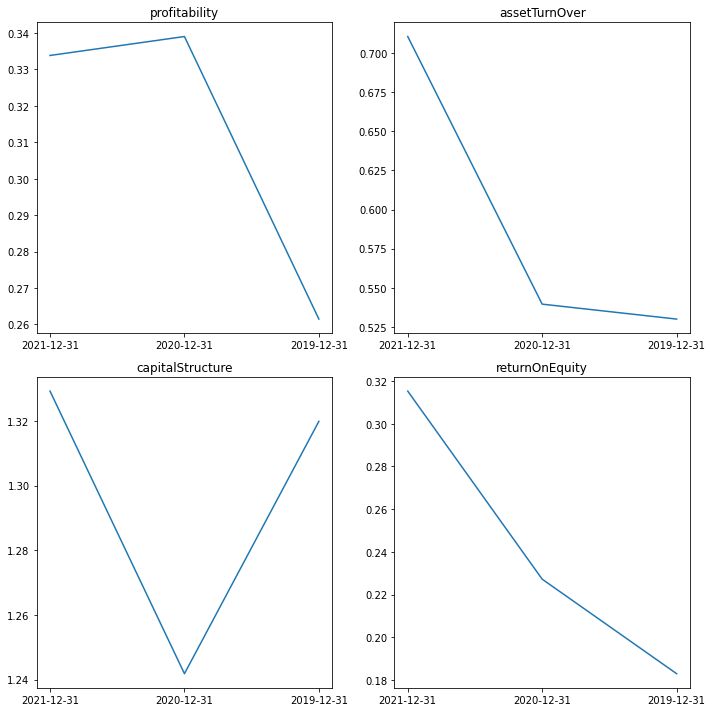

In [7]:
fig, axs= plt.subplots(2,2, figsize=(10,10))
#set x for all of them
x= df1['year']
#loop version
values= ['profitability', 'assetTurnOver', 'capitalStructure', 'returnOnEquity']
for i in range(0,2):
    for j in range(0, 2):
      valueIndex = i*2+j
      axs[i,j].plot (x, df1[values[valueIndex]])
      axs[i,j].set_title(values[valueIndex])
      fig.tight_layout()